# Handling	Outliers	- IQR

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


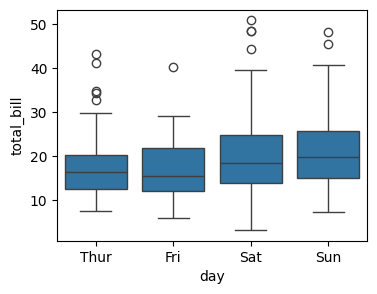

In [12]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='day', y='total_bill', data=df)
plt.show()

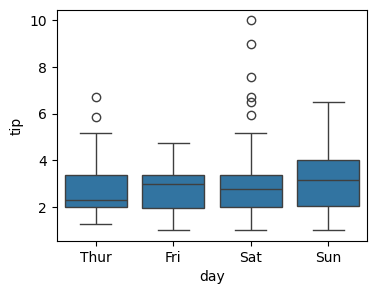

In [13]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='day', y='tip', data=df)
plt.show()

In [14]:
q1 = df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)
q1, q3

(13.3475, 24.127499999999998)

In [15]:
# inter-quartile range
iqr = q3 - q1
iqr

10.779999999999998

In [16]:
# lower bound and upper bound
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound, upper_bound

(-2.8224999999999945, 40.29749999999999)

In [17]:
sum(df['total_bill'] < 0)

0

In [18]:
df[df['total_bill'] < 0]

,total_bill,tip,sex,smoker,day,time,size


In [19]:
condition = (df['total_bill'] < lower_bound) | (df['total_bill'] > upper_bound)
sum(condition)

9

In [20]:
df['is_outlier'] = (df['total_bill'] < lower_bound) | (df['total_bill'] > upper_bound)

In [21]:
df[df['is_outlier'] == True]

,total_bill,tip,sex,smoker,day,time,size,is_outlier
59,48.27,6.73,Male,No,Sat,Dinner,4,True
102,44.30,2.50,Female,Yes,Sat,Dinner,3,True
142,41.19,5.00,Male,No,Thur,Lunch,5,True
156,48.17,5.00,Male,No,Sun,Dinner,6,True
170,50.81,10.00,Male,Yes,Sat,Dinner,3,True
182,45.35,3.50,Male,Yes,Sun,Dinner,3,True
184,40.55,3.00,Male,Yes,Sun,Dinner,2,True
197,43.11,5.00,Female,Yes,Thur,Lunch,4,True
212,48.33,9.00,Male,No,Sat,Dinner,4,True


- continous numeric values: mean, median, group mean, group median
- discrete numeric values: mode, group mode

In [22]:
# mean
sum([10, 12, 13, 13, 15, 17, 19 , 23, 1000000000000]) / 9

111111111124.66667

In [23]:
[10, 12, 13, 13, 15, 17, 19 , 23, 1000000000000]
median = 15

In [24]:
total_bill_median = df['total_bill'].median()
total_bill_median

17.795

In [25]:
df['total_bill'][(df['total_bill'] < lower_bound) | (df['total_bill'] > upper_bound)] = total_bill_median
df[df['is_outlier'] == True]

C:\Users\rajba\AppData\Local\Temp\ipykernel_5528\51026972.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['total_bill'][(df['total_bill'] < lower_bound) | (df['total_bill'] > upper_bound)] = total_bill_median
C:\Users\rajba\AppData\Lo

,total_bill,tip,sex,smoker,day,time,size,is_outlier
59,17.795,6.73,Male,No,Sat,Dinner,4,True
102,17.795,2.50,Female,Yes,Sat,Dinner,3,True
142,17.795,5.00,Male,No,Thur,Lunch,5,True
156,17.795,5.00,Male,No,Sun,Dinner,6,True
170,17.795,10.00,Male,Yes,Sat,Dinner,3,True
182,17.795,3.50,Male,Yes,Sun,Dinner,3,True
184,17.795,3.00,Male,Yes,Sun,Dinner,2,True
197,17.795,5.00,Female,Yes,Thur,Lunch,4,True
212,17.795,9.00,Male,No,Sat,Dinner,4,True


In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_outlier
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


In [27]:
# Handling outlier of column `tip`
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q1 + 1.5 * iqr

In [28]:
df['is_outlier'] = (df['tip'] < lower_bound) | (df['tip'] > upper_bound)
df[df['is_outlier'] == True]

,total_bill,tip,sex,smoker,day,time,size,is_outlier
5,25.290,4.71,Male,No,Sun,Dinner,4,True
11,35.260,5.00,Female,No,Sun,Dinner,4,True
23,39.420,7.58,Male,No,Sat,Dinner,4,True
39,31.270,5.00,Male,No,Sat,Dinner,3,True
44,30.400,5.60,Male,No,Sun,Dinner,4,True
46,22.230,5.00,Male,No,Sun,Dinner,2,True
47,32.400,6.00,Male,No,Sun,Dinner,4,True
52,34.810,5.20,Female,No,Sun,Dinner,4,True
59,17.795,6.73,Male,No,Sat,Dinner,4,True
73,25.280,5.00,Female,Yes,Sat,Dinner,2,True


In [29]:
df[df['is_outlier'] == True].shape

(32, 8)

In [30]:
tip_median = df['tip'].median()
tip_median

2.9

In [31]:
import numpy as np

df['tip'] = np.where(
    (df['tip'] < lower_bound) | (df['tip'] > upper_bound), tip_median, df['tip']
)
df[df['is_outlier'] == True]

,total_bill,tip,sex,smoker,day,time,size,is_outlier
5,25.290,2.9,Male,No,Sun,Dinner,4,True
11,35.260,2.9,Female,No,Sun,Dinner,4,True
23,39.420,2.9,Male,No,Sat,Dinner,4,True
39,31.270,2.9,Male,No,Sat,Dinner,3,True
44,30.400,2.9,Male,No,Sun,Dinner,4,True
46,22.230,2.9,Male,No,Sun,Dinner,2,True
47,32.400,2.9,Male,No,Sun,Dinner,4,True
52,34.810,2.9,Female,No,Sun,Dinner,4,True
59,17.795,2.9,Male,No,Sat,Dinner,4,True
73,25.280,2.9,Female,Yes,Sat,Dinner,2,True


### Appendix: for np.where

In [32]:
import numpy as np

## np.where(condition, true_value, false_value)

In [33]:
arr = np.array([1, 2, 3, 4, 5])
arr < 3

array([ True,  True, False, False, False])

In [34]:
np.where(arr < 3, 1000, 0)

array([1000, 1000,    0,    0,    0])

In [35]:
np.where(arr < 3, arr, 0)

array([1, 2, 0, 0, 0])

## Imputing outliers with group's statistical measures (group mean, group median)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
col_name = 'tip'

q1 = df[col_name].quantile(0.25)
q3 = df[col_name].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

df['is_outlier'] = (df[col_name] < lower_bound) | (df[col_name] > upper_bound)
df[df['is_outlier'] == True]

-0.34375 5.90625


,total_bill,tip,sex,smoker,day,time,size,is_outlier
23,39.42,7.58,Male,No,Sat,Dinner,4,True
47,32.40,6.00,Male,No,Sun,Dinner,4,True
59,48.27,6.73,Male,No,Sat,Dinner,4,True
141,34.30,6.70,Male,No,Thur,Lunch,6,True
170,50.81,10.00,Male,Yes,Sat,Dinner,3,True
183,23.17,6.50,Male,Yes,Sun,Dinner,4,True
212,48.33,9.00,Male,No,Sat,Dinner,4,True
214,28.17,6.50,Female,Yes,Sat,Dinner,3,True
239,29.03,5.92,Male,No,Sat,Dinner,3,True


In [20]:
def replace_in_group(group: pd.DataFrame):
    col_name = 'tip'
    grp_median = group[col_name].median()

    q1 = group[col_name].quantile(0.25)
    q3 = group[col_name].quantile(0.75)

    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f"Name: {group.name}, Lower: {lower_bound:.3f}, Upper: {upper_bound:.3f}")
    print('-'*15)

    group['is_outlier'] = (group[col_name] < lower_bound) | (group[col_name] > upper_bound)
    
    group[col_name] = np.where(
        (group[col_name] < lower_bound) | (group[col_name] > upper_bound),
         grp_median,
         group[col_name]
    )
    return group

df_replaced = df.groupby('sex').apply(replace_in_group)
df_replaced[df_replaced['is_outlier'] == True]


Name: Male, Lower: -0.640, Upper: 6.400
---------------
Name: Female, Lower: -0.250, Upper: 5.750
---------------


C:\Users\rajba\AppData\Local\Temp\ipykernel_11376\1534776072.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_replaced = df.groupby('sex').apply(replace_in_group)
C:\Users\rajba\AppData\Local\Temp\ipykernel_11376\1534776072.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_replaced = df.groupby('sex').apply(replace_in_group)


total_bill   tip     sex smoker   day    time  size  is_outlier
sex                                                                        
Male   23        39.42  3.00    Male     No   Sat  Dinner     4        True
       59        48.27  3.00    Male     No   Sat  Dinner     4        True
       141       34.30  3.00    Male     No  Thur   Lunch     6        True
       170       50.81  3.00    Male    Yes   Sat  Dinner     3        True
       183       23.17  3.00    Male    Yes   Sun  Dinner     4        True
       212       48.33  3.00    Male     No   Sat  Dinner     4        True
Female 214       28.17  2.75  Female    Yes   Sat  Dinner     3        True